**Disciplina: ACA052 - Meteorologia Sinótica I**

Monitor: Ronald Guiuseppi Ramírez Nina

File: Aula_03.ipynb

# **Radiossondagens com Python**

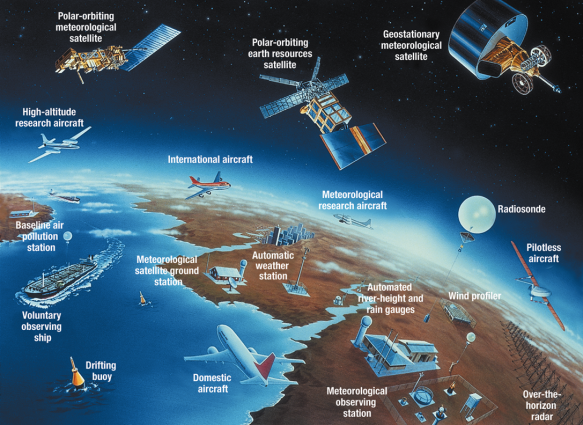

Os radiossondagens são parte do sistema mundial de observações meteorológicas. Uma radiossondagem está constituido por um conjunto de equipamentos e sensores transportado por balões meteorológicos. Os dados meteorológicos coletados por uma radiossondagem são os seguintes:
- Preeão
- Altura
- Temperatura
- Temperatura do ponto de orvalho
- Direção do vento
- Velocidade do vento
- Entre outras

Geralmente, os lançamentos dos radiossondagens são feitos nos aeródromos dos diferentes paises. 

Com esses dados meteorológicos obtidos com as radiossondagens, nós vamos fazer diagramas termodinâmicos, como o **Skew-T Log-P**. 

# **Objetivo**

- Plotar o diagrama Skew-T Log-P com dados obtidos de radiossondagem da base de dados da Universidade de Wyoming, utilizando Python (Colab).

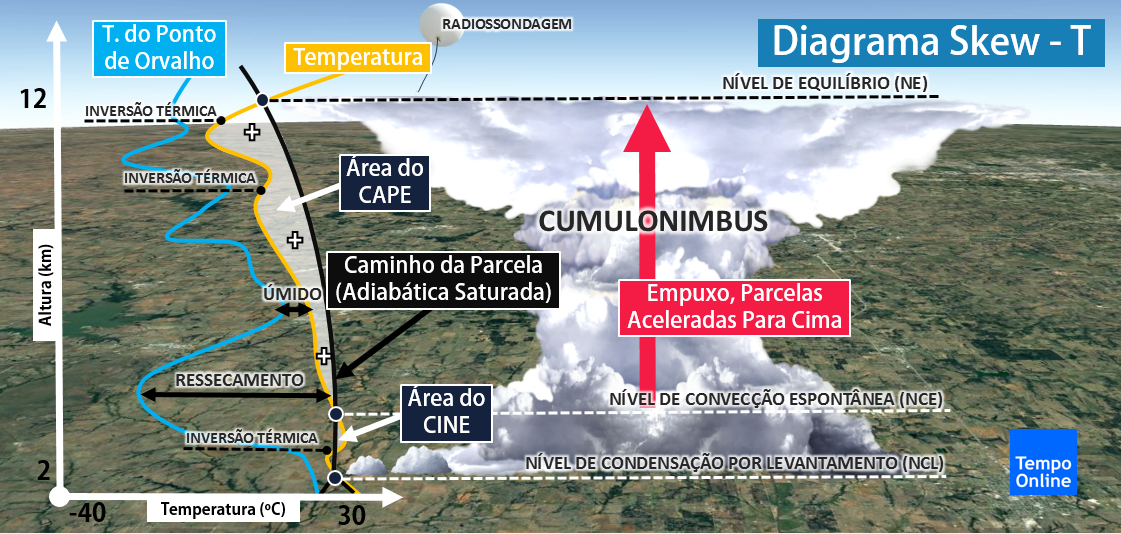

## **1. Pacote Siphon para acesso a dados de Radiossondagens**

O Siphon é um pacote com acesso a banco de dados meteorológicos de diferentes instituções. Os bancos de dados são os seguintes:

- Wyoming University
- National Data Buoy Center (NDBC)
- Integrated Global Radiosonde Archive version 2 (IGRA v2)
- Iowa State's upper air archive

Para atingir nosso objetivos, vamos a acessar ao banco de dados das radiossondagens da Wyoming University.


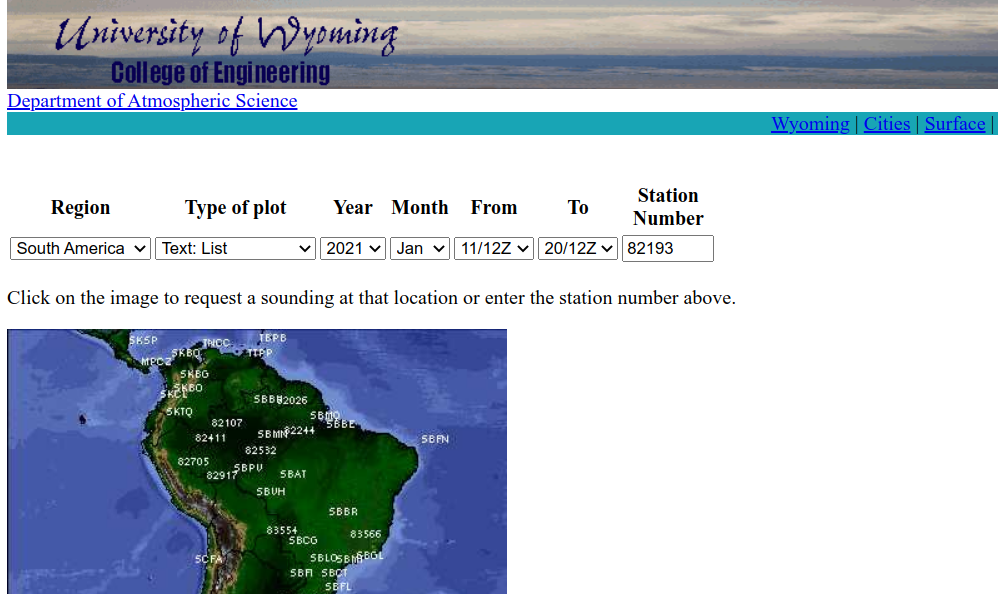

Instalação do pacote **siphon** no Colab (devido a que é um pacote externo)

O pacote **Metpy** é um pacote externo e portanto precisamos de instalar-lho.

**Nota:** A versão do Matplotlib 3.5.0 apresenta alguns conflitos com o **Metpy**. Para resolver esse problema, é necessário desinstalar o pacote **Matplotlib** (instalado por default) e instalar a **versão 3.3.0 do Matplotlib**.

In [1]:
!pip install siphon
!pip install matplotlib==3.3.0
!pip install metpy

     |████████████████████████████████| 69 kB 2.6 MB/s 
     |████████████████████████████████| 11.5 MB 5.1 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 367 kB 5.0 MB/s 
     |████████████████████████████████| 6.3 MB 35.3 MB/s 
     |████████████████████████████████| 209 kB 62.9 MB/s 


Para ter certeza de que foi instalado bem a versão **Matplotlib=3.3.0** vamos a fazer um **Restart runtime**. Para isso vamos a seguir os seguintes passos:

- Clic no menú **Runtime**
- Clic na opção **Restart runtime**
- Executar de novo a celda anterior **(celda dos !pip install)**

Com isso o código não deveria apresentar problemas na sua execução. 

# **1. Importando pacotes necessários para a leitura dos dados .csv e a elaboração do diagrama Skew-T Log-P**



In [1]:
# Importando o pacote hydrobr
print("Importando os pacotes")
import pandas as pd
import numpy as np

# Importar pacote para montar o drive e ter acesso aos dados em nosso drive
print("Montando o drive para acesso aos dados")
from google.colab import drive
drive.mount('/content/drive')

print("Terminou de ler os pacotes")

Importando os pacotes
Montando o drive para acesso aos dados
Mounted at /content/drive
Terminou de ler os pacotes


Ler o arquivo .csv extraído da web da **Wyoming University**

In [2]:
data = pd.read_csv('/content/drive/Shareddrives/ACA0522_2022/Scripts-Python/dados/radiossondagem/Radiosonde_Data.csv', header=None)

Observar a estrutura dos dados importados e formatar o objeto para poder trabalhar com esses dados.

In [3]:
# Observando a estrutura dos dados
data

,0
0,<!-- saved from url=(0117)http://weather.uwyo....
1,"<html><head><meta http-equiv=""Content-Type"" co..."
2,"</head><body bgcolor=""white"">"
3,<h2>82193 SBBE Belem (Aeroporto) Observations ...
4,<pre>-----------------------------------------...
...,...
140,<!--
141,window.focus();
142,// -->
143,</script>


Removendo as filas e só manter as filas e colunas com os dados necessários para poder fazer o plot do **diagrama Skew-T Log-P**

Utilizar as seguintes funções para observas as filas que precisam ser removidas:
- data.head()
- data.tail()

In [4]:
# Removend as filas que não contém os dados da radiossondagem
data_new = data.drop(data.index[[0,1,2,3,4,6,7,89,90,91,92,93,94,95,96,97,98,99,\
                                 100,101,102,103,104,105,106,107,108,109,110,\
                                 111,112,113,114,115,116,117,118,119,120,\
                                 121,122,123,124,125,126,127,128,129,\
                                 130,131,132,133,134,135,136,137,138,139,\
                                 140,141,142,143,144]])

# Visualizar a nova estrutura dos dados
data_new

,0
5,PRES HGHT TEMP DWPT RELH MIXR D...
8,1011.0 16 26.4 24.6 90 19.72 ...
9,1000.0 116 25.4 23.4 89 18.51 ...
10,952.0 547 22.6 19.7 84 15.46 ...
11,925.0 799 21.0 17.6 81 13.88 ...
...,...
84,44.0 21323 -69.2 -91.3 3 0.00 ...
85,40.2 21862 -68.9 -91.9 2 0.00 ...
86,32.0 23246 -63.2 -92.1 1 0.00 ...
87,31.9 23265 -63.1 -92.1 1 0.00 ...


Salvar a nova estrutura de dados para trabalhar com um **DataFrame** listo para ser processado.

In [5]:
# Criando os headers do DataFrame
headers = data_new.iloc[0]

# Salvando os valores do radiossondagem (Só valores numéricos)
df = pd.DataFrame(data_new.values[1:], columns = headers)
# Salvando o arquivo em um formato .csv
df.to_csv('radiossondagem.csv')
# Vera nova estrutura de dados
df

5,PRES HGHT TEMP DWPT RELH MIXR DRCT SKNT THTA THTE THTV
0,1011.0 16 26.4 24.6 90 19.72 ...
1,1000.0 116 25.4 23.4 89 18.51 ...
2,952.0 547 22.6 19.7 84 15.46 ...
3,925.0 799 21.0 17.6 81 13.88 ...
4,924.0 808 20.9 17.6 81 13.89 ...
...,...
76,44.0 21323 -69.2 -91.3 3 0.00 ...
77,40.2 21862 -68.9 -91.9 2 0.00 ...
78,32.0 23246 -63.2 -92.1 1 0.00 ...
79,31.9 23265 -63.1 -92.1 1 0.00 ...


Abrir o dataset salvado e trabalhar com o novo DataFrame

In [6]:
# Abrir o arquivo .csv com os dados da radiosondagem salvador
sondagem = pd.read_csv('radiossondagem.csv', delimiter='\s+')
# Remover a primeira coluna que não apresenta dados de nosso interesse.
sondagem = sondagem.drop(sondagem.columns[[0]], axis = 'columns')
# Eliminando os dados faltantes do DataFrame <- NaN
sondagem = sondagem.dropna()
# Observas o dataframe e suas variáveis
sondagem

,PRES,HGHT,TEMP,DWPT,RELH,MIXR,DRCT,SKNT,THTA,THTE,THTV
0,1011.0,16,26.4,24.6,90,19.72,120.0,3.0,298.6,356.3,302.1
1,1000.0,116,25.4,23.4,89,18.51,100.0,3.0,298.6,352.6,301.9
2,952.0,547,22.6,19.7,84,15.46,25.0,10.0,300.0,345.4,302.7
3,925.0,799,21.0,17.6,81,13.88,45.0,14.0,300.8,341.8,303.3
4,924.0,808,20.9,17.6,81,13.89,50.0,15.0,300.8,341.8,303.3
...,...,...,...,...,...,...,...,...,...,...,...
74,49.0,20681,-69.4,-90.6,3,0.00,145.0,6.0,482.2,482.2,482.2
75,48.0,20804,-69.4,-90.8,3,0.00,105.0,12.0,485.2,485.2,485.2
76,44.0,21323,-69.2,-91.3,3,0.00,80.0,22.0,498.0,498.0,498.0
77,40.2,21862,-68.9,-91.9,2,0.00,84.0,33.0,511.6,511.6,511.6


# **2. MetPy**

Com os dados disponíveis em um DataFrame obtidos com o pacote **siphon** vamos utilizar-lhos com o usso do pacote **Metpy** para gerar o diagrama Skew-T Log-P. O pacote **Metpy** é mantido pelo UCAR/UNIDATA. 

O pacote **Metpy** é um pacote externo e portanto precisamos de instalar-lho.

**Nota:** A versão do Matplotlib 3.5.0 apresenta alguns conflitos com o Metpy. Para resolver esse problema, é necessário desinstalar o pacote Matplotlib (instalado por default) e instalar a versão 3.3.0 do Matplotlib.

O **Metpy** apresenta o módulo **units** que tem como função associar a cada variável meteorológica da radiossondagem sua unidade de medição respectiva. 

In [7]:
from metpy.units import units

# **3. Diagrama Skew-T Log-P**

Com as variáveis com as unidades asignadas, está tudo pronto para poder gerar o diagrama Skew-T Log-P. O pacote **Metpy** tem o módulo **SkewT** na classe **metpy.plots** (e outros tipos de gráficos). 

O **Metpy** também apresenta a classe **metpy.calc** que possui várias funções para o cálculo de parâmetros termodinâmicos. 

In [8]:
# Importar o matplotlib
import matplotlib.pyplot as plt
# Cálculos termodinâmicos
import metpy.calc as mpcalc
# Skew-T Log-P
from metpy.plots import SkewT
# Importar o numpy
import numpy as np
# Graficar hodógrafa
from metpy.plots import Hodograph

import matplotlib.gridspec as gridspec

## **4. ATIVIDADE**

Para facilitar a elaboração do diagrama Skew-T Log-P, vamos criar uma função que vai fazer todos os passos necessários para a obtenção de uma figura com o diagrama Skew-T Log-P, a hodógrafa e os parâmetros termodinâmicos.

In [11]:
def skewt_logp(sondagem, seu_nome):

  # Eliminar os dados faltantes do radiossondagem
  sondagem = sondagem.dropna()
  
  # Adicionar unidades de medição as variáveis meteorológicas
  pressure = sondagem['PRES'].values * units('hPa')
  temperature = sondagem['TEMP'].values * units('celsius')
  dewpoint = sondagem['DWPT'].values * units('celsius')
  u_wind = sondagem['SKNT'].values * np.cos(sondagem['SKNT'].values * np.pi/180) * 0.5 * units('m/s')
  v_wind = sondagem['SKNT'].values * np.sin(sondagem['SKNT'].values * np.pi/180) * 0.5 * units('m/s')

  # Fazer un resample aos níveis de pressão para plotar os ventos
  levels = np.arange(100, 1050, 50) * units('hPa')
  levels = mpcalc.resample_nn_1d(pressure, levels)

  # ---------------------------------------------------------------------------

  # Criando a figura

  fig = plt.figure(figsize=(12, 12))

  # Asignando o nome da estação e a data
  #nome = sondagem['station'][0]
  #dia = sondagem['time'][0]

  # Utilizando a função gridspec para configurar o gráfico
  gs = gridspec.GridSpec(3, 3)
  skew = SkewT(fig, rotation=45, subplot=gs[0:2, :2])

  # Adicionado temperaturas e barbelas do vento
  skew.plot(pressure, temperature, color='red',)
  skew.plot(pressure, dewpoint, color='green')
  skew.plot_barbs(pressure[levels], u_wind[levels], v_wind[levels], flip_barb=True)

  # Adicionando as curvas das adiabáticas e razão de mistura no Skew-T Log-P
  skew.plot_dry_adiabats()
  skew.plot_moist_adiabats()
  skew.plot_mixing_lines()

  # Calcular e adicionar o perfil da parcela de ar
  perfil = mpcalc.parcel_profile(pressure, temperature[0], dewpoint[0]).to('degC')
  skew.plot(pressure, perfil, color='black', linewidth=2)

  # Adicionar o CAPE e o CIN
  skew.shade_cin(pressure, temperature, perfil, dewpoint)
  skew.shade_cape(pressure, temperature, perfil)

  # Destacar a isoterma de 0 ºC
  skew.ax.axvline(0, color='cyan', linestyle='--')

  # Ajustar o diagrama Skew-T Log-P
  skew.ax.set_xlim(-30, 40)

  # Calcular os parâmetros termodinâmicos para ser adicionados ao diagrama Skew-T Log-P
  lcl_pressure, lcl_temperature = mpcalc.lcl(pressure[0], temperature[0], dewpoint[0])
  lfc_pressure, lfc_temperature = mpcalc.lfc(pressure, temperature, dewpoint)
  el_pressure, el_temperature = mpcalc.el(pressure, temperature, dewpoint)
  sbcape, sbcin = mpcalc.surface_based_cape_cin(pressure, temperature, dewpoint)
  precipitable_water = mpcalc.precipitable_water(pressure, dewpoint)
  showalter = mpcalc.showalter_index(pressure, temperature, dewpoint)
  lifted = mpcalc.lifted_index(pressure, temperature, perfil)

  # Formatando os eixos do diagrama Skew-T Log-P
  plt.xlabel(r'Temperature ($\degree$C)', fontsize=14)
  plt.ylabel(r'Pressure (hPa)', fontsize=14)
  plt.title(f'{nome}', fontsize=20, loc='left')
  plt.title(f'{dia} UTC', fontsize=15, loc='center')

  # -------------------------------------------------------------------------------------------
  # HODÓGRAFA

  # Agregar hodógrafo
  ax = fig.add_subplot(gs[0:1, -1])
  hodografo = Hodograph(ax, component_range=80.)
  hodografo.add_grid(increment=10)
  hodografo.wind_vectors(u_wind[levels], v_wind[levels])
  niveis_cores = hodografo.plot_colormapped(u_wind[levels], v_wind[levels], pressure[levels], cmap='magma_r')

  # Agregar a barra de cores para os níveis do vetor vento
  fig.colorbar(niveis_cores, orientation='vertical', label='Pressão (hPa)', shrink = 0.8)

  # colocar limites em x e y
  ax.set_xlim(-40, 40)
  ax.set_ylim(-40, 40)

  # --------------------------------------------------------------------------------------------
  # ADICIONAR OS PARÂMETROS TERMODINÂMICOS

  # Agregar parâmetros termodinâmicos
  ax3 = fig.add_subplot(gs[1, -1])
  ax3.axis('off')

  # coluna 1
  ax3.text(0.1, 1,'Nível do LCL', size = 12)
  ax3.text(0.1, 0.9,'Temp. do LCL', size = 12)
  ax3.text(0.1, 0.8,'Nível do LFC', size = 12)
  ax3.text(0.1, 0.7,'Temp. do LFC', size = 12)
  ax3.text(0.1, 0.6,'Equi. Level', size = 12)
  ax3.text(0.1, 0.5,'SBCAPE', size = 12)
  ax3.text(0.1, 0.4,'SBCIN', size = 12)
  ax3.text(0.1, 0.3,'Água Precip.', size = 12)
  ax3.text(0.1, 0.2,'Showalter Index', size = 12)
  ax3.text(0.1, 0.1,'Lifted Index', size = 12)

  # coluna 2
  ax3.text(0.7, 1, '{:.2f} hPa'.format(np.array(lcl_pressure)), size = 12)
  ax3.text(0.7, 0.9, '{:.2f} C'.format(np.array(lcl_temperature)), size = 12)
  ax3.text(0.7, 0.8, '{:.2f} hPa'.format(np.array(lfc_pressure)), size = 12)
  ax3.text(0.7, 0.7, '{:.2f} C'.format(np.array(lfc_temperature)), size = 12)
  ax3.text(0.7, 0.6, '{:.2f} hPa'.format(np.array(el_pressure)), size = 12)
  ax3.text(0.7, 0.5, '{:.2f} J/kg'.format(np.array(sbcape)), size = 12)
  ax3.text(0.7, 0.4, '{:.2f} J/kg'.format(np.array(sbcin)), size = 12)
  ax3.text(0.7, 0.3, '{:.2f} mm'.format(np.array(precipitable_water)), size = 12)
  ax3.text(0.7, 0.2, '{:.2f}'.format(np.array(showalter)[0]), size = 12)
  ax3.text(0.7, 0.1, '{:.2f}'.format(np.array(lifted)[0]), size = 12)
  ax3.text(0.1, 0.01, 'Elaborado por: ' + f'{Autor}', size = 12)

  plt.tight_layout()
  plt.show()

  fig.savefig('/content/drive/Shareddrives/ACA0522_2022/Scripts-Python/'+\
              f'{pasta}' + '/Aula_03/' + f'{nome}_' + f'{dia}' + '_radiossondagem_dados_csv.png',\
              format='png', dpi = 100)

Para poder acessar ao diagrama **Skew-T Log-P** de alguma estação de interesse, só precisam digitar o seguinte:

- Nome da sua pasta
- O nome do autor para seu diagrama
- Ano de interesse
- Mês de interesse
- Dia de interesse
- Hora de interesse
- Nome da estação em letras capitais (e.g. SBBE)

Finalmente, as figuras serão salvadas em suas pastas de trabalho

Escrever o nome da sua Pasta de Trabalho:ronald
                              
Escrever seu nome:Ronald
                              
Escrever o nome da estação:SBBE
                              
Escrever a data dos dados:2022-01-12 12Z
------------------------------------------------------------------------


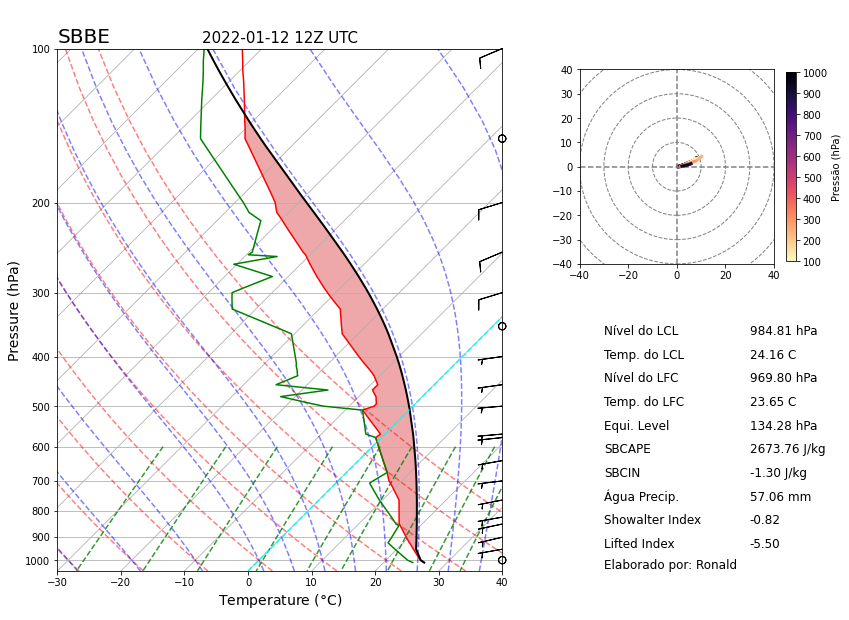

In [12]:
5# plotar skewt-logp com a função

# Escrever o nome da sua pasta
pasta = input("Escrever o nome da sua Pasta de Trabalho:")
print('                              ')
Autor = input("Escrever seu nome:")
print('                              ')
nome = input("Escrever o nome da estação:")
print('                              ')
dia = input("Escrever a data dos dados:")
print('------------------------------------------------------------------------')

skewt_logp(sondagem, Autor)